# Consignas


- Exploración inicial:
  - Describir el dataset (medias, máximos, mínimos, correlaciones).
  - Identificar qué variables podrían estar más relacionadas con la presión arterial.

- Modelo de regresión lineal múltiple:

  - Estimar un modelo con todas las variables predictoras.

- Selección de variables:
  - Determinar qué variables tienen mayor peso explicativo en la presión arterial.
  - Comparar el modelo con todas las variables vs. uno simplificado con las más relevantes (analizar correlación por ejemplo u otro parámetro que consideres)

- Evaluación del modelo:
  - Calcular el R², RMSE y MAE.
  - Interpretar si el modelo ajusta adecuadamente.

- Informe final:
  - Concluir cuáles factores influyen realmente en la presión arterial.
  - Discutir la importancia de edad, peso, estrés y ejercicio frente a ingresos y horas de TV.

# Solución

## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# Aumentar ancho de visualizacion
pd.set_option('display.width', 1000)

## Carga del DataFrame
- Cargar datos desde CSV, Excel, base de datos, etc.

In [2]:
dfv1 = pd.read_csv("https://raw.githubusercontent.com/GabrielBellesi-edu/AA2A1C-25/e679d9b01a3e679cf0274f5a1c09ff5f2127fafd/clase_4/datos/dataset_regresion_multiple.csv" , sep=";")
dfv1

,edad,horas_ejercicio,peso,estres,ingresos,horas_tv,presion_arterial
0,58,7,81,1,21150,12,73.83
1,48,2,55,1,94740,22,82.26
2,34,2,81,3,86617,24,90.47
3,62,0,53,6,36896,34,93.49
4,27,4,60,7,66175,29,65.74
...,...,...,...,...,...,...,...
95,63,0,97,3,79031,34,123.14
96,27,2,69,7,27357,18,80.67
97,43,1,57,5,52479,19,90.55
98,30,4,56,5,81476,17,64.44


## Revisión del DataFrame
- Revisar dimensiones (df.shape) y primeras filas (df.head()).
- Ver tipos de datos (df.dtypes) y nulos (df.isnull().sum()).


In [3]:
dfv1.shape

(100, 7)

In [4]:
dfv1.head()

,edad,horas_ejercicio,peso,estres,ingresos,horas_tv,presion_arterial
0,58,7,81,1,21150,12,73.83
1,48,2,55,1,94740,22,82.26
2,34,2,81,3,86617,24,90.47
3,62,0,53,6,36896,34,93.49
4,27,4,60,7,66175,29,65.74


In [5]:
dfv1.dtypes

,0
edad,int64
horas_ejercicio,int64
peso,int64
estres,int64
ingresos,int64
horas_tv,int64
presion_arterial,float64


In [6]:
dfv1.isnull().sum()

,0
edad,0
horas_ejercicio,0
peso,0
estres,0
ingresos,0
horas_tv,0
presion_arterial,0


## Análisis exploratorio (EDA)
- Estadísticas descriptivas (df.describe()).
- Visualización de distribución de variables (histogramas, boxplots).
- Identificación de outliers.


In [7]:
dfv1.describe()

,edad,horas_ejercicio,peso,estres,ingresos,horas_tv,presion_arterial
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,41.600000,4.370000,73.28000,4.700000,59778.350000,19.760000,85.395000
std,13.311346,3.013957,14.29917,2.512595,23603.253158,11.136545,20.531869
min,20.000000,0.000000,50.00000,1.000000,20412.000000,0.000000,38.140000
25%,30.000000,2.000000,60.00000,3.000000,38042.000000,11.000000,72.045000
50%,41.500000,4.000000,73.00000,5.000000,58634.500000,18.500000,84.415000
75%,53.250000,7.000000,84.00000,7.000000,80475.250000,28.250000,98.465000
max,64.000000,9.000000,99.00000,9.000000,99605.000000,39.000000,137.270000


### Frecuencia Variables / Histogramas

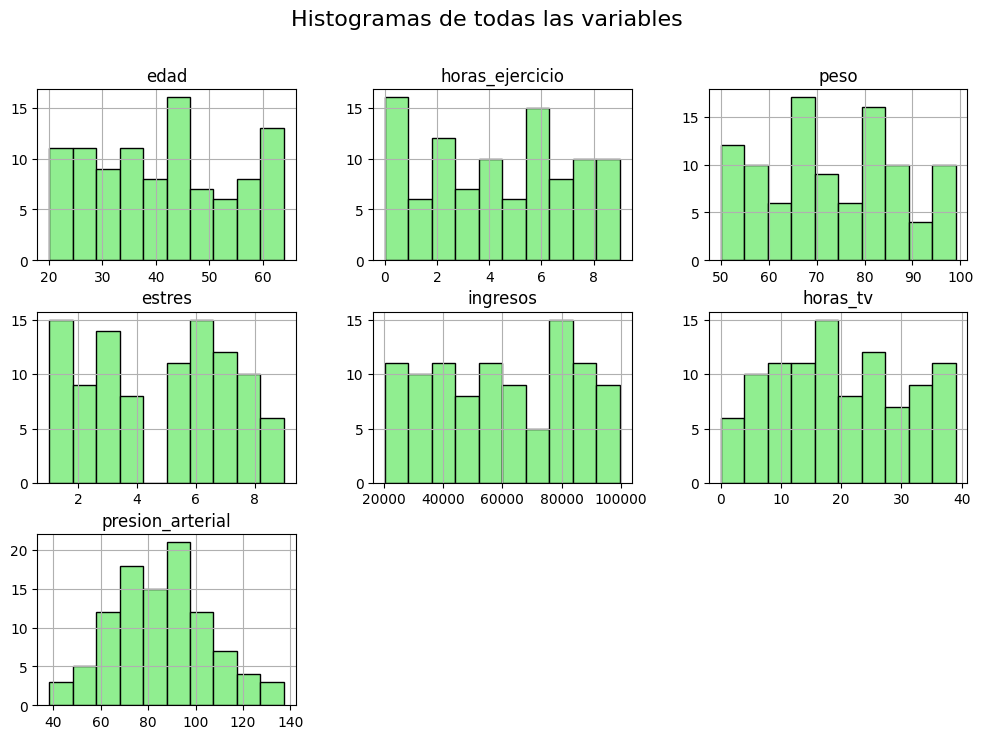

In [8]:
dfv1.hist(figsize=(12,8), color="lightgreen", edgecolor="black")
plt.suptitle("Histogramas de todas las variables", fontsize=16)
plt.show()


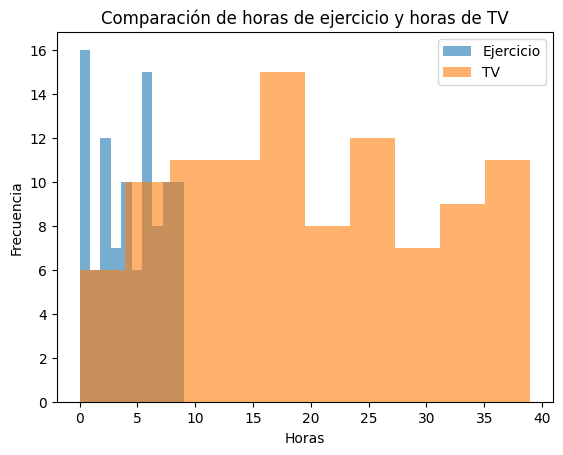

In [9]:
plt.hist(dfv1["horas_ejercicio"], bins=10, alpha=0.6, label="Ejercicio")
plt.hist(dfv1["horas_tv"], bins=10, alpha=0.6, label="TV")
plt.title("Comparación de horas de ejercicio y horas de TV")
plt.xlabel("Horas")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


### Boxplot Valores outliners

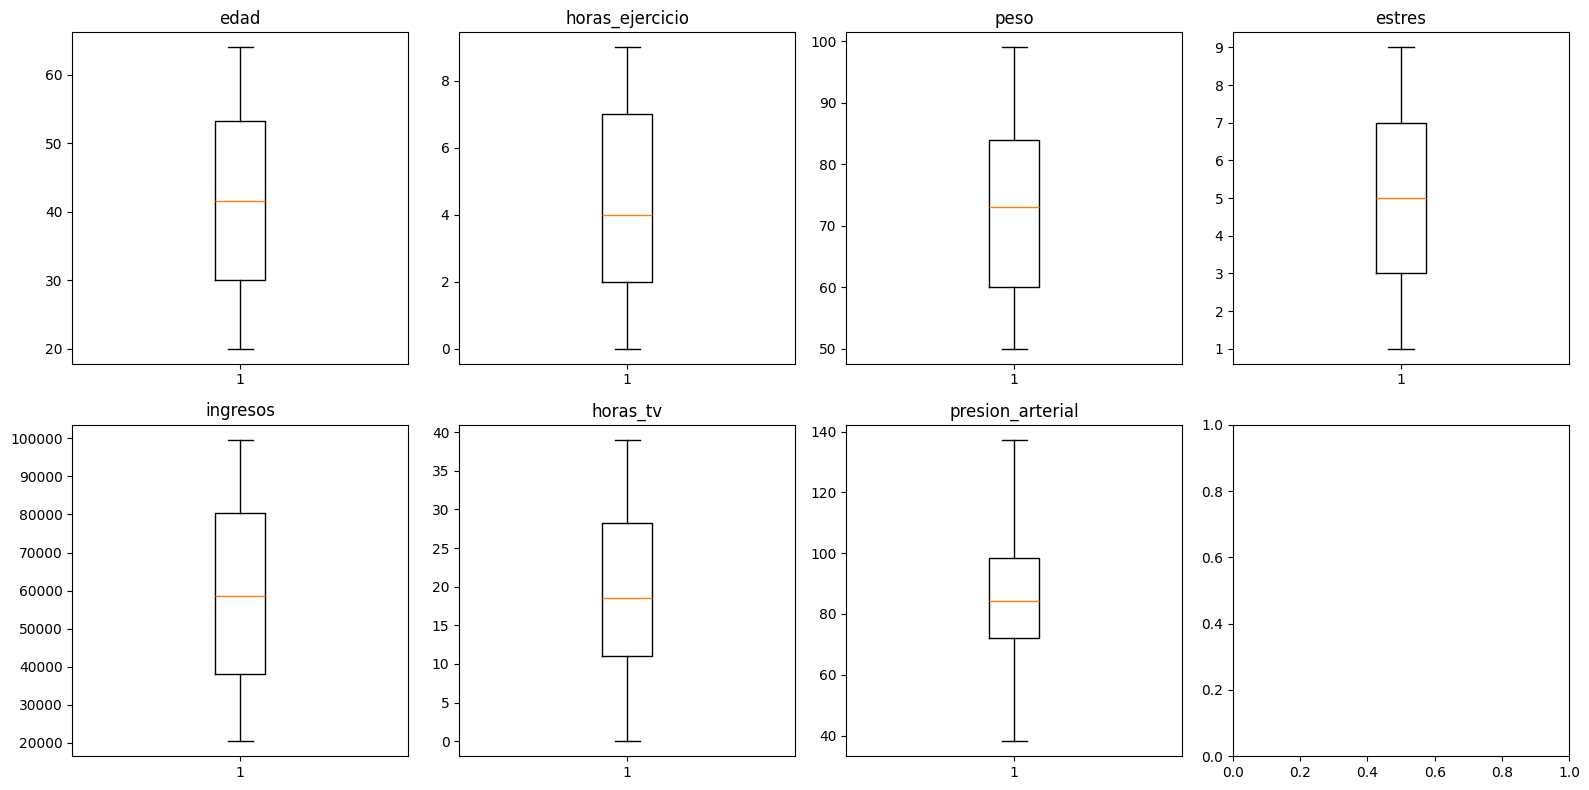

In [10]:
cols = dfv1.columns

fig, axs = plt.subplots(2, 4, figsize=(16, 8))  # 2 filas x 4 columnas
axs = axs.flatten()  # convertir a lista para iterar fácil

for i, col in enumerate(cols):
    axs[i].boxplot(dfv1[col])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()


### Análisis de correlación
- Matriz de correlación (df.corr()).
- Heatmap con seaborn (sns.heatmap()).
- Scatter plots para relaciones lineales.

In [11]:
dfv1.corr()

,edad,horas_ejercicio,peso,estres,ingresos,horas_tv,presion_arterial
edad,1.000000,-0.195928,-0.000361,-0.174863,-0.114863,0.139984,0.418731
horas_ejercicio,-0.195928,1.000000,-0.021882,-0.041216,-0.005404,0.058045,-0.358865
peso,-0.000361,-0.021882,1.000000,0.056342,-0.018638,0.012098,0.588843
estres,-0.174863,-0.041216,0.056342,1.000000,-0.079145,-0.130028,0.366368
ingresos,-0.114863,-0.005404,-0.018638,-0.079145,1.000000,-0.034992,-0.009394
horas_tv,0.139984,0.058045,0.012098,-0.130028,-0.034992,1.000000,0.040789
presion_arterial,0.418731,-0.358865,0.588843,0.366368,-0.009394,0.040789,1.000000


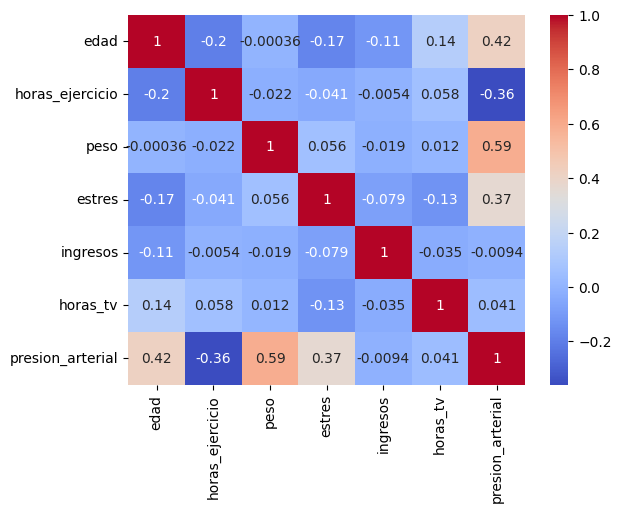

In [12]:
sns.heatmap(dfv1.corr(), annot=True, cmap="coolwarm")
plt.show()


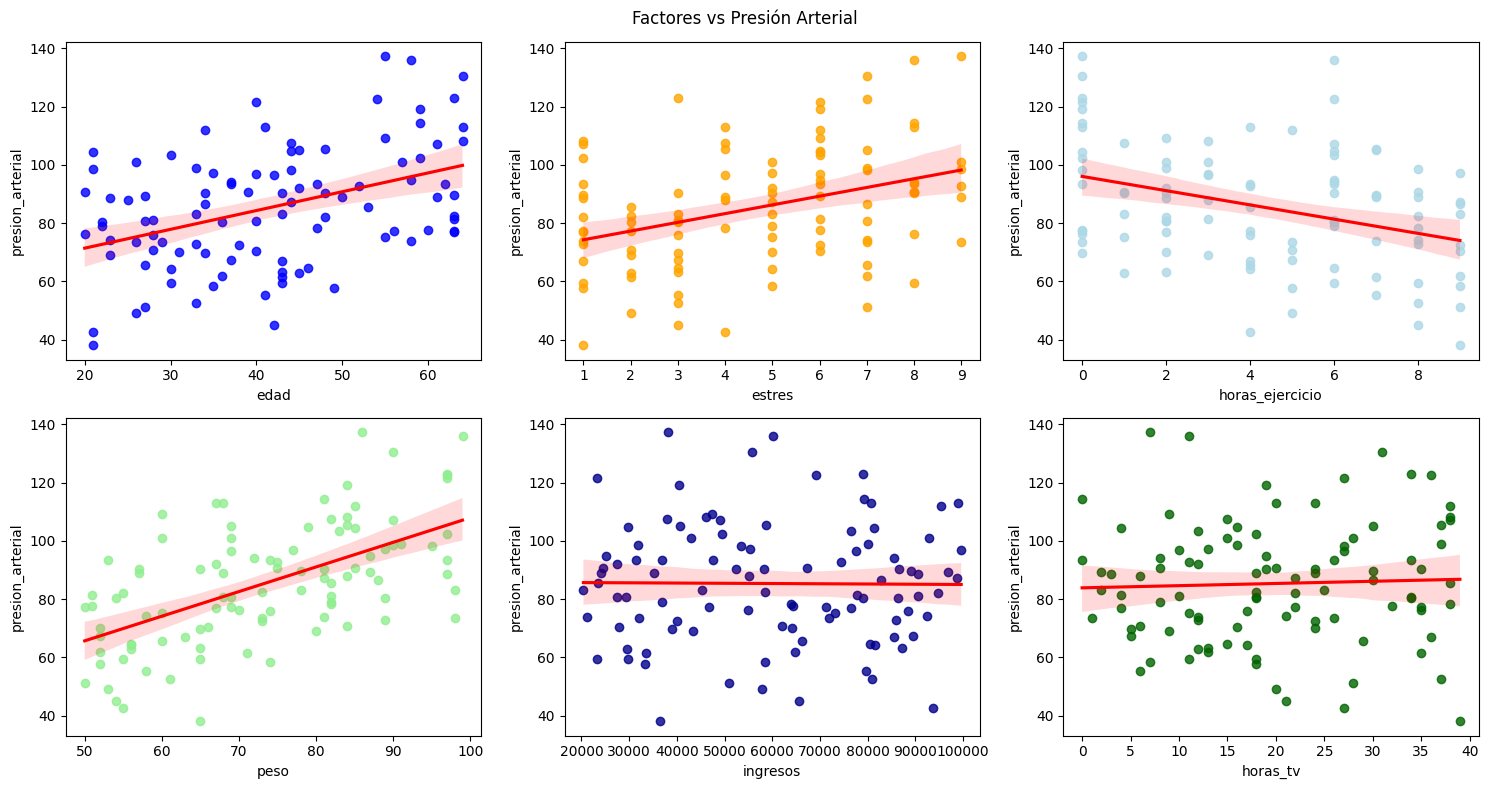

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

axs[0,0].set_ylabel("presion_arterial")
axs[1,0].set_ylabel("presion_arterial")

sns.regplot(x='edad', y='presion_arterial', data=dfv1, ax=axs[0,0], scatter_kws={'color':'blue'}, line_kws={'color':'red'})
axs[0,0].set_xlabel("edad")

sns.regplot(x='estres', y='presion_arterial', data=dfv1, ax=axs[0,1], scatter_kws={'color':'orange'}, line_kws={'color':'red'})
axs[0,1].set_xlabel("estres")

sns.regplot(x='horas_ejercicio', y='presion_arterial', data=dfv1, ax=axs[0,2], scatter_kws={'color':'lightblue'}, line_kws={'color':'red'})
axs[0,2].set_xlabel("horas_ejercicio")

sns.regplot(x='peso', y='presion_arterial', data=dfv1, ax=axs[1,0], scatter_kws={'color':'lightgreen'}, line_kws={'color':'red'})
axs[1,0].set_xlabel("peso")

sns.regplot(x='ingresos', y='presion_arterial', data=dfv1, ax=axs[1,1], scatter_kws={'color':'darkblue'}, line_kws={'color':'red'})
axs[1,1].set_xlabel("ingresos")

sns.regplot(x='horas_tv', y='presion_arterial', data=dfv1, ax=axs[1,2], scatter_kws={'color':'darkgreen'}, line_kws={'color':'red'})
axs[1,2].set_xlabel("horas_tv")

plt.suptitle("Factores vs Presión Arterial")
plt.tight_layout()
plt.show()



In [14]:
fig = px.scatter_3d(dfv1,x="edad",y="peso", z="presion_arterial",color="horas_ejercicio",size="estres",title="Visualización 3D con 5 variables")
fig.show()

Correlación con `presion_arterial`


| Variable             | Correlación | Interpretación                                                                               |
| -------------------- | ---------------------------------- | -------------------------------------------------------------------------------------------- |
| **edad**             | 0.4187                             | Correlación positiva moderada: a mayor edad, tiende a aumentar la presión arterial.          |
| **horas\_ejercicio** | -0.3589                            | Correlación negativa debil: más ejercicio se asocia con menor presión arterial.           |
| **peso**             | 0.5888                             | Correlación positiva moderada: mayor peso se relaciona con mayor presión arterial.             |
| **estres**           | 0.3664                             | Correlación positiva debil: más estrés, mayor presión arterial.                           |
| **ingresos**         | -0.0094                            | Prácticamente nula: los ingresos no parecen influir en la presión arterial.                  |
| **horas\_tv**        | 0.0408                             | Muy débil: el tiempo frente a la TV no tiene relación significativa con la presión arterial. |
------------------------------------------------------------------------------

- Las variables más relevantes para explicar la presión arterial son peso, edad, horas de ejercicio y estrés.

- El peso tiene la relación más fuerte y positiva, indicando que un aumento de peso se asocia con mayor presión arterial.

- El ejercicio parece tener un efecto protector (negativo), mientras que el estrés también contribuye a aumentarla.

- Ingresos y horas frente a la TV no parecen tener impacto significativo en la presión arterial.

## Modelado v1 (Todas las variables) (75/25)

### Selección de variables
- Elegir variables predictoras (X) y variable objetivo (y).

In [61]:
#Variables predictoras
X_v1 = dfv1[['edad', 'estres', 'horas_ejercicio','peso','ingresos','horas_tv']]

#Variables Objetivo
y_v1 = dfv1['presion_arterial']

### División de datos
- Separar en train/test (train_test_split).

In [62]:
#Separo mis datos en train y test con la funcion de python train_test_split()
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_v1, y_v1, test_size=0.25, random_state=42)

### Entrenamiento del modelo
- Elegir modelo según tipo de problema:
  - Regresión lineal si la variable objetivo es continua.
  - Clasificación si es categórica.
- Entrenar el modelo con datos de entrenamiento (fit).
- Ajustar hiperparámetros si es necesario (GridSearchCV, RandomizedSearchCV).

In [63]:
#Creo modelo de regresion lineal y lo almaceno en model_multiple
model_multiple_v1 = LinearRegression()

#Envio los datos de entrenamiento a mi objeto model_multiple
model_multiple_v1.fit(X_train_v1, y_train_v1)

#Envio los datos de prueba a mi objeto model_multiple
y_pred_multiple_v1 = model_multiple_v1.predict(X_test_v1)


### Evaluación del modelo
- Predecir con el conjunto de prueba (predict).
- Métricas: Regresión: RMSE, MAE, R².


In [64]:
# Ecuacion generada: Intercepto
print("Intercepto:", model_multiple_v1.intercept_)

# Ecuacion generada: coeficientes
print("Coeficientes:", model_multiple_v1.coef_)

Intercepto: -23.87230315680347
Coeficientes: [ 7.01207782e-01  3.57648037e+00 -1.53587819e+00  8.44560556e-01
  8.09596431e-05  1.66863832e-01]



Evaluación del modelo (Regresión Múltiple):
MAE: 9.25057695959363
MSE: 130.42962501335683
R²: 0.6841409671684686
Varianza explicada: 0.6841689451188642


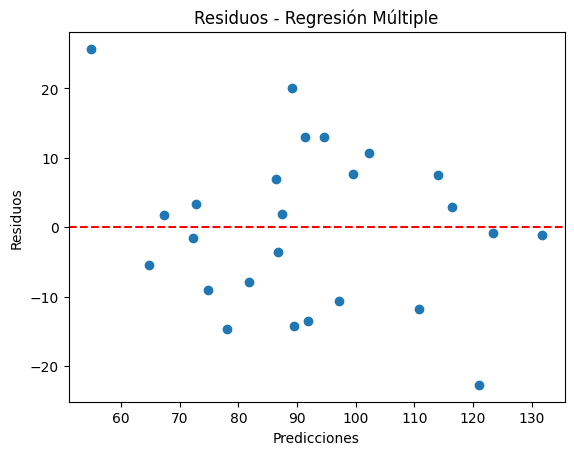

In [65]:
# Evaluación del modelo
print("\nEvaluación del modelo (Regresión Múltiple):")

#Promedio del valor absoluto de los errores
print("MAE:", mean_absolute_error(y_test_v1, y_pred_multiple_v1))

#Promedio del valor de los errores elevados al cuadrado
print("MSE:", mean_squared_error(y_test_v1, y_pred_multiple_v1))

#Que tan bueno es mi modelo para predecir datos nuevos. Es un porcentaje
print("R²:", r2_score(y_test_v1, y_pred_multiple_v1))

#Que tan bien explica mis datos. Es un porcentaje
print("Varianza explicada:", explained_variance_score(y_test_v1, y_pred_multiple_v1))


residuos = y_test_v1 - y_pred_multiple_v1
plt.scatter(y_pred_multiple_v1, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos - Regresión Múltiple")
plt.show()




### Interpretación y visualización
- Analizar coeficientes del modelo (importancia de features).
- Visualizar predicciones vs valores reales.
- Identificar patrones y posibles mejoras.

### Ajustes y mejoras
- Probar otras variables, transformaciones, o modelos.
- Evaluar el impacto de outliers o valores faltantes.
- Refinar el pipeline para producción.

### Guardado de resultados
- Guardar modelo entrenado (joblib o pickle).
- Guardar dataset procesado y resultados de predicción.

## Modelado v2 (Edad - Estres - Horas ejercicio - Peso) (75/25)

### Selección de variables
- Elegir variables predictoras (X) y variable objetivo (y).

In [66]:
#Variables predictoras
X_v2 = dfv1[['edad', 'estres', 'horas_ejercicio','peso']]

#Variables Objetivo
y_v2 = dfv1['presion_arterial']

### División de datos
- Separar en train/test (train_test_split).

In [67]:
#Separo mis datos en train y test con la funcion de python train_test_split()
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y_v2, test_size=0.25, random_state=42)

### Entrenamiento del modelo
- Elegir modelo según tipo de problema:
  - Regresión lineal si la variable objetivo es continua.
  - Clasificación si es categórica.
- Entrenar el modelo con datos de entrenamiento (fit).
- Ajustar hiperparámetros si es necesario (GridSearchCV, RandomizedSearchCV).

In [68]:
#Creo modelo de regresion lineal y lo almaceno en model_multiple
model_multiple_v2 = LinearRegression()

#Envio los datos de entrenamiento a mi objeto model_multiple
model_multiple_v2.fit(X_train_v2, y_train_v2)

#Envio los datos de prueba a mi objeto model_multiple
y_pred_multiple_v2 = model_multiple_v2.predict(X_test_v2)


### Evaluación del modelo
- Predecir con el conjunto de prueba (predict).
- Métricas: Regresión: RMSE, MAE, R².


In [69]:
# Ecuacion generada: Intercepto
print("Intercepto:", model_multiple_v2.intercept_)

# Ecuacion generada: coeficientes
print("Coeficientes:", model_multiple_v2.coef_)





Intercepto: -13.800201806956608
Coeficientes: [ 0.69460356  3.3296392  -1.50026074  0.83478814]



Evaluación del modelo (Regresión Múltiple):
MAE: 9.003650428075321
MSE: 121.70809563578364
R²: 0.7052617350440947
Varianza explicada: 0.705304582242068


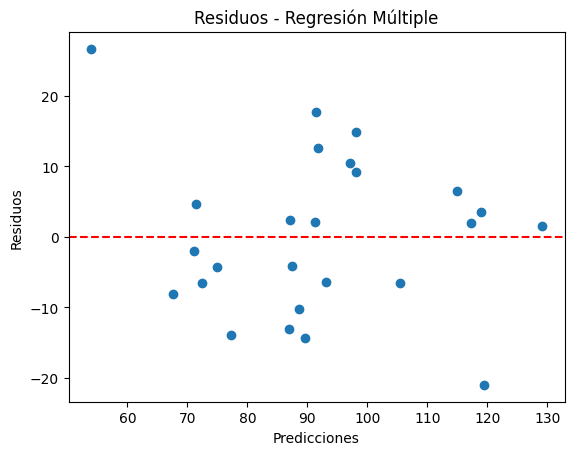

In [70]:
# Evaluación del modelo
print("\nEvaluación del modelo (Regresión Múltiple):")

#Promedio del valor absoluto de los errores
print("MAE:", mean_absolute_error(y_test_v2, y_pred_multiple_v2))

#Promedio del valor de los errores elevados al cuadrado
print("MSE:", mean_squared_error(y_test_v2, y_pred_multiple_v2))

#Que tan bueno es mi modelo para predecir datos nuevos. Es un porcentaje
print("R²:", r2_score(y_test_v2, y_pred_multiple_v2))

#Que tan bien explica mis datos. Es un porcentaje
print("Varianza explicada:", explained_variance_score(y_test_v2, y_pred_multiple_v2))


residuos = y_test_v2 - y_pred_multiple_v2
plt.scatter(y_pred_multiple_v2, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos - Regresión Múltiple")
plt.show()




### Interpretación y visualización
- Analizar coeficientes del modelo (importancia de features).
- Visualizar predicciones vs valores reales.
- Identificar patrones y posibles mejoras.

### Ajustes y mejoras
- Probar otras variables, transformaciones, o modelos.
- Evaluar el impacto de outliers o valores faltantes.
- Refinar el pipeline para producción.

### Guardado de resultados
- Guardar modelo entrenado (joblib o pickle).
- Guardar dataset procesado y resultados de predicción.

## Modelado v3 (Edad - Estres - Peso) (75/25)

### Selección de variables
- Elegir variables predictoras (X) y variable objetivo (y).

In [71]:
#Variables predictoras
X_v3 = dfv1[['edad', 'estres','peso']]

#Variables Objetivo
y_v3 = dfv1['presion_arterial']

### División de datos
- Separar en train/test (train_test_split).

In [72]:
#Separo mis datos en train y test con la funcion de python train_test_split()
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = train_test_split(X_v3, y_v3, test_size=0.25, random_state=42)

### Entrenamiento del modelo
- Elegir modelo según tipo de problema:
  - Regresión lineal si la variable objetivo es continua.
  - Clasificación si es categórica.
- Entrenar el modelo con datos de entrenamiento (fit).
- Ajustar hiperparámetros si es necesario (GridSearchCV, RandomizedSearchCV).

In [73]:
#Creo modelo de regresion lineal y lo almaceno en model_multiple
model_multiple_v3 = LinearRegression()

#Envio los datos de entrenamiento a mi objeto model_multiple
model_multiple_v3.fit(X_train_v3, y_train_v3)

#Envio los datos de prueba a mi objeto model_multiple
y_pred_multiple_v3 = model_multiple_v3.predict(X_test_v3)


### Evaluación del modelo
- Predecir con el conjunto de prueba (predict).
- Métricas: Regresión: RMSE, MAE, R².


In [74]:
# Ecuacion generada: Intercepto
print("Intercepto:", model_multiple_v3.intercept_)

# Ecuacion generada: coeficientes
print("Coeficientes:", model_multiple_v3.coef_)





Intercepto: -23.473881744393708
Coeficientes: [0.76132723 3.34402348 0.8347152 ]



Evaluación del modelo (Regresión Múltiple):
MAE: 10.439682220566931
MSE: 159.8823903181093
R²: 0.6128157451384237
Varianza explicada: 0.6166075781513103


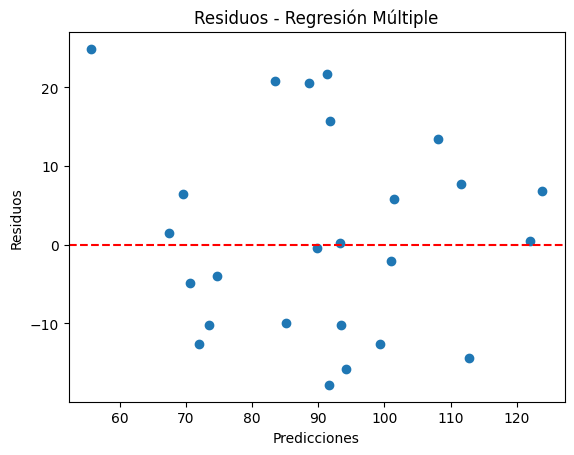

In [75]:
# Evaluación del modelo
print("\nEvaluación del modelo (Regresión Múltiple):")

#Promedio del valor absoluto de los errores
print("MAE:", mean_absolute_error(y_test_v3, y_pred_multiple_v3))

#Promedio del valor de los errores elevados al cuadrado
print("MSE:", mean_squared_error(y_test_v3, y_pred_multiple_v3))

#Que tan bueno es mi modelo para predecir datos nuevos. Es un porcentaje
print("R²:", r2_score(y_test_v3, y_pred_multiple_v3))

#Que tan bien explica mis datos. Es un porcentaje
print("Varianza explicada:", explained_variance_score(y_test_v3, y_pred_multiple_v3))


residuos = y_test_v3 - y_pred_multiple_v3
plt.scatter(y_pred_multiple_v3, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos - Regresión Múltiple")
plt.show()




### Interpretación y visualización
- Analizar coeficientes del modelo (importancia de features).
- Visualizar predicciones vs valores reales.
- Identificar patrones y posibles mejoras.

### Ajustes y mejoras
- Probar otras variables, transformaciones, o modelos.
- Evaluar el impacto de outliers o valores faltantes.
- Refinar el pipeline para producción.

### Guardado de resultados
- Guardar modelo entrenado (joblib o pickle).
- Guardar dataset procesado y resultados de predicción.

## Modelado v4 (Edad - Peso) (75/25)

### Selección de variables
- Elegir variables predictoras (X) y variable objetivo (y).

In [76]:
#Variables predictoras
X_v4 = dfv1[['edad', 'peso']]

#Variables Objetivo
y_v4 = dfv1['presion_arterial']

### División de datos
- Separar en train/test (train_test_split).

In [77]:
#Separo mis datos en train y test con la funcion de python train_test_split()
X_train_v4, X_test_v4, y_train_v4, y_test_v4 = train_test_split(X_v4, y_v4, test_size=0.25, random_state=42)

### Entrenamiento del modelo
- Elegir modelo según tipo de problema:
  - Regresión lineal si la variable objetivo es continua.
  - Clasificación si es categórica.
- Entrenar el modelo con datos de entrenamiento (fit).
- Ajustar hiperparámetros si es necesario (GridSearchCV, RandomizedSearchCV).

In [78]:
#Creo modelo de regresion lineal y lo almaceno en model_multiple
model_multiple_v4 = LinearRegression()

#Envio los datos de entrenamiento a mi objeto model_multiple
model_multiple_v4.fit(X_train_v4, y_train_v4)

#Envio los datos de prueba a mi objeto model_multiple
y_pred_multiple_v4 = model_multiple_v4.predict(X_test_v4)


### Evaluación del modelo
- Predecir con el conjunto de prueba (predict).
- Métricas: Regresión: RMSE, MAE, R².


In [79]:
# Ecuacion generada: Intercepto
print("Intercepto:", model_multiple_v4.intercept_)

# Ecuacion generada: coeficientes
print("Coeficientes:", model_multiple_v4.coef_)





Intercepto: -4.818791603914647
Coeficientes: [0.63091603 0.86472131]



Evaluación del modelo (Regresión Múltiple):
MAE: 12.73743139127796
MSE: 235.86742154176994
R²: 0.42880418741508164
Varianza explicada: 0.4427952701759488


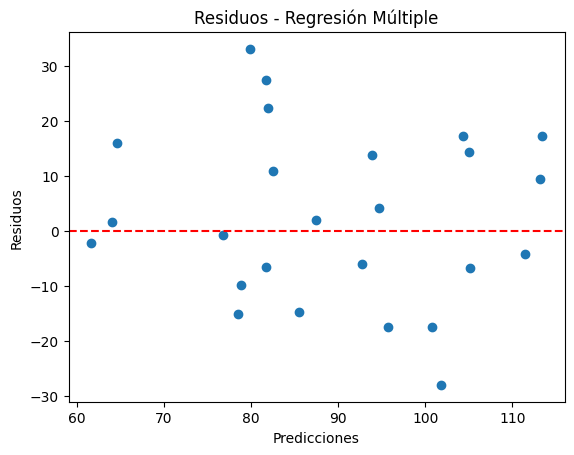

In [80]:
# Evaluación del modelo
print("\nEvaluación del modelo (Regresión Múltiple):")

#Promedio del valor absoluto de los errores
print("MAE:", mean_absolute_error(y_test_v4, y_pred_multiple_v4))

#Promedio del valor de los errores elevados al cuadrado
print("MSE:", mean_squared_error(y_test_v4, y_pred_multiple_v4))

#Que tan bueno es mi modelo para predecir datos nuevos. Es un porcentaje
print("R²:", r2_score(y_test_v4, y_pred_multiple_v4))

#Que tan bien explica mis datos. Es un porcentaje
print("Varianza explicada:", explained_variance_score(y_test_v4, y_pred_multiple_v4))


residuos = y_test_v4 - y_pred_multiple_v4
plt.scatter(y_pred_multiple_v4, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos - Regresión Múltiple")
plt.show()




### Interpretación y visualización
- Analizar coeficientes del modelo (importancia de features).
- Visualizar predicciones vs valores reales.
- Identificar patrones y posibles mejoras.

### Ajustes y mejoras
- Probar otras variables, transformaciones, o modelos.
- Evaluar el impacto de outliers o valores faltantes.
- Refinar el pipeline para producción.

### Guardado de resultados
- Guardar modelo entrenado (joblib o pickle).
- Guardar dataset procesado y resultados de predicción.

## Modelado v5 (Peso) (75/25)

### Selección de variables
- Elegir variables predictoras (X) y variable objetivo (y).

In [40]:
#Variables predictoras
X_v5 = dfv1[['peso']]

#Variables Objetivo
y_v5 = dfv1['presion_arterial']

### División de datos
- Separar en train/test (train_test_split).

In [41]:
#Separo mis datos en train y test con la funcion de python train_test_split()
X_train_v5, X_test_v5, y_train_v5, y_test_v5 = train_test_split(X_v5, y_v5, test_size=0.25, random_state=42)

### Entrenamiento del modelo
- Elegir modelo según tipo de problema:
  - Regresión lineal si la variable objetivo es continua.
  - Clasificación si es categórica.
- Entrenar el modelo con datos de entrenamiento (fit).
- Ajustar hiperparámetros si es necesario (GridSearchCV, RandomizedSearchCV).

In [42]:
#Creo modelo de regresion lineal y lo almaceno en model_multiple
model_multiple_v5 = LinearRegression()

#Envio los datos de entrenamiento a mi objeto model_multiple
model_multiple_v5.fit(X_train_v5, y_train_v5)

#Envio los datos de prueba a mi objeto model_multiple
y_pred_multiple_v5 = model_multiple_v5.predict(X_test_v5)


### Evaluación del modelo
- Predecir con el conjunto de prueba (predict).
- Métricas: Regresión: RMSE, MAE, R².


In [43]:
# Ecuacion generada: Intercepto
print("Intercepto:", model_multiple_v5.intercept_)

# Ecuacion generada: coeficientes
print("Coeficientes:", model_multiple_v5.coef_)





Intercepto: 22.529226920128025
Coeficientes: [0.85138919]



Evaluación del modelo (Regresión Múltiple):
MAE: 15.118670255919012
MSE: 311.93512946065204
R²: 0.24459241305393453
Varianza explicada: 0.253370554086648


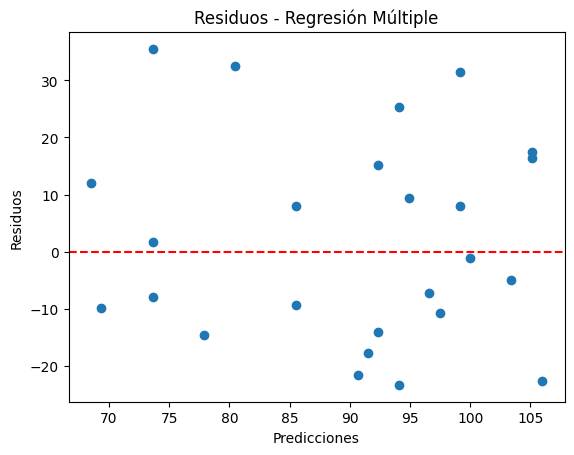

In [44]:
# Evaluación del modelo
print("\nEvaluación del modelo (Regresión Múltiple):")

#Promedio del valor absoluto de los errores
print("MAE:", mean_absolute_error(y_test_v5, y_pred_multiple_v5))

#Promedio del valor de los errores elevados al cuadrado
print("MSE:", mean_squared_error(y_test_v5, y_pred_multiple_v5))

#Que tan bueno es mi modelo para predecir datos nuevos. Es un porcentaje
print("R²:", r2_score(y_test_v5, y_pred_multiple_v5))

#Que tan bien explica mis datos. Es un porcentaje
print("Varianza explicada:", explained_variance_score(y_test_v5, y_pred_multiple_v5))


residuos = y_test_v5 - y_pred_multiple_v5
plt.scatter(y_pred_multiple_v5, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos - Regresión Múltiple")
plt.show()




### Interpretación y visualización
- Analizar coeficientes del modelo (importancia de features).
- Visualizar predicciones vs valores reales.
- Identificar patrones y posibles mejoras.

### Ajustes y mejoras
- Probar otras variables, transformaciones, o modelos.
- Evaluar el impacto de outliers o valores faltantes.
- Refinar el pipeline para producción.

### Guardado de resultados
- Guardar modelo entrenado (joblib o pickle).
- Guardar dataset procesado y resultados de predicción.

## Modelado v2.1 (Edad - Estres - Horas ejercicio - Peso) (90/10)

### Selección de variables
- Elegir variables predictoras (X) y variable objetivo (y).

In [81]:
#Variables predictoras
X_v21 = dfv1[['edad', 'estres', 'horas_ejercicio','peso']]

#Variables Objetivo
y_v21 = dfv1['presion_arterial']

### División de datos
- Separar en train/test (train_test_split).

In [82]:
#Separo mis datos en train y test con la funcion de python train_test_split()
X_train_v21, X_test_v21, y_train_v21, y_test_v21 = train_test_split(X_v21, y_v21, test_size=0.10, random_state=42)

### Entrenamiento del modelo
- Elegir modelo según tipo de problema:
  - Regresión lineal si la variable objetivo es continua.
  - Clasificación si es categórica.
- Entrenar el modelo con datos de entrenamiento (fit).
- Ajustar hiperparámetros si es necesario (GridSearchCV, RandomizedSearchCV).

In [83]:
#Creo modelo de regresion lineal y lo almaceno en model_multiple
model_multiple_v21 = LinearRegression()

#Envio los datos de entrenamiento a mi objeto model_multiple
model_multiple_v21.fit(X_train_v21, y_train_v21)

#Envio los datos de prueba a mi objeto model_multiple
y_pred_multiple_v21 = model_multiple_v21.predict(X_test_v21)


### Evaluación del modelo
- Predecir con el conjunto de prueba (predict).
- Métricas: Regresión: RMSE, MAE, R².


In [84]:
# Ecuacion generada: Intercepto
print("Intercepto:", model_multiple_v21.intercept_)

# Ecuacion generada: coeficientes
print("Coeficientes:", model_multiple_v21.coef_)





Intercepto: -12.51048406555995
Coeficientes: [ 0.69991858  3.29897495 -1.6196022   0.82871817]



Evaluación del modelo (Regresión Múltiple):
MAE: 8.018085828729093
MSE: 97.50144996821571
R²: 0.694671608185863
Varianza explicada: 0.7368767438095558


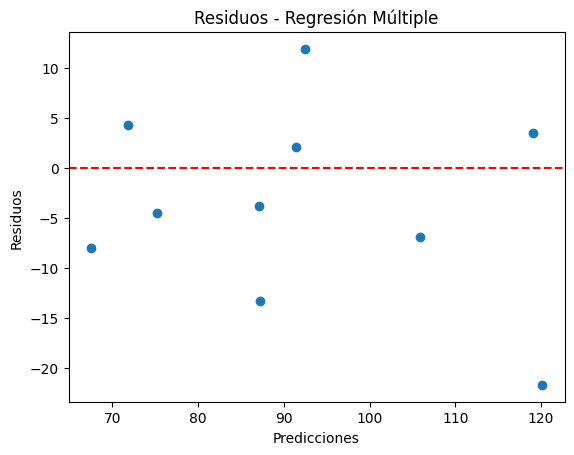

In [85]:
# Evaluación del modelo
print("\nEvaluación del modelo (Regresión Múltiple):")

#Promedio del valor absoluto de los errores
print("MAE:", mean_absolute_error(y_test_v21, y_pred_multiple_v21))

#Promedio del valor de los errores elevados al cuadrado
print("MSE:", mean_squared_error(y_test_v21, y_pred_multiple_v21))

#Que tan bueno es mi modelo para predecir datos nuevos. Es un porcentaje
print("R²:", r2_score(y_test_v21, y_pred_multiple_v21))

#Que tan bien explica mis datos. Es un porcentaje
print("Varianza explicada:", explained_variance_score(y_test_v21, y_pred_multiple_v21))


residuos = y_test_v21 - y_pred_multiple_v21
plt.scatter(y_pred_multiple_v21, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos - Regresión Múltiple")
plt.show()




### Interpretación y visualización
- Analizar coeficientes del modelo (importancia de features).
- Visualizar predicciones vs valores reales.
- Identificar patrones y posibles mejoras.

### Ajustes y mejoras
- Probar otras variables, transformaciones, o modelos.
- Evaluar el impacto de outliers o valores faltantes.
- Refinar el pipeline para producción.

### Guardado de resultados
- Guardar modelo entrenado (joblib o pickle).
- Guardar dataset procesado y resultados de predicción.

## Modelado v2.2 (Edad - Estres - Horas ejercicio - Peso) (70/30)

### Selección de variables
- Elegir variables predictoras (X) y variable objetivo (y).

In [86]:
#Variables predictoras
X_v22 = dfv1[['edad', 'estres', 'horas_ejercicio','peso']]

#Variables Objetivo
y_v22 = dfv1['presion_arterial']

### División de datos
- Separar en train/test (train_test_split).

In [87]:
#Separo mis datos en train y test con la funcion de python train_test_split()
X_train_v22, X_test_v22, y_train_v22, y_test_v22 = train_test_split(X_v22, y_v22, test_size=0.30, random_state=42)

### Entrenamiento del modelo
- Elegir modelo según tipo de problema:
  - Regresión lineal si la variable objetivo es continua.
  - Clasificación si es categórica.
- Entrenar el modelo con datos de entrenamiento (fit).
- Ajustar hiperparámetros si es necesario (GridSearchCV, RandomizedSearchCV).

In [88]:
#Creo modelo de regresion lineal y lo almaceno en model_multiple
model_multiple_v22 = LinearRegression()

#Envio los datos de entrenamiento a mi objeto model_multiple
model_multiple_v22.fit(X_train_v22, y_train_v22)

#Envio los datos de prueba a mi objeto model_multiple
y_pred_multiple_v22 = model_multiple_v22.predict(X_test_v22)


### Evaluación del modelo
- Predecir con el conjunto de prueba (predict).
- Métricas: Regresión: RMSE, MAE, R².


In [89]:
# Ecuacion generada: Intercepto
print("Intercepto:", model_multiple_v22.intercept_)

# Ecuacion generada: coeficientes
print("Coeficientes:", model_multiple_v22.coef_)





Intercepto: -9.38291919473312
Coeficientes: [ 0.69882001  3.16260644 -1.5848619   0.7766826 ]



Evaluación del modelo (Regresión Múltiple):
MAE: 9.401797173401373
MSE: 130.362900619487
R²: 0.6996025481278572
Varianza explicada: 0.7182451050084048


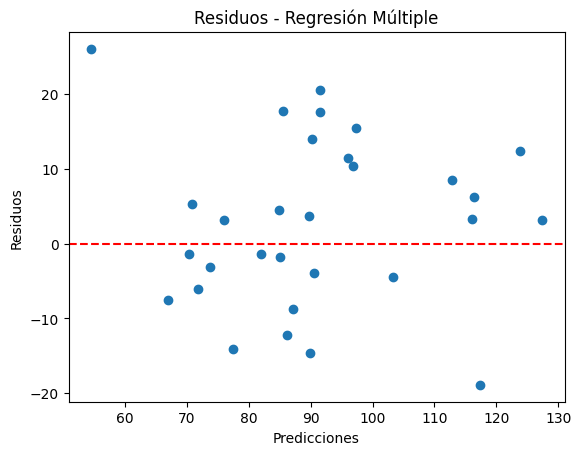

In [90]:
# Evaluación del modelo
print("\nEvaluación del modelo (Regresión Múltiple):")

#Promedio del valor absoluto de los errores
print("MAE:", mean_absolute_error(y_test_v22, y_pred_multiple_v22))

#Promedio del valor de los errores elevados al cuadrado
print("MSE:", mean_squared_error(y_test_v22, y_pred_multiple_v22))

#Que tan bueno es mi modelo para predecir datos nuevos. Es un porcentaje
print("R²:", r2_score(y_test_v22, y_pred_multiple_v22))

#Que tan bien explica mis datos. Es un porcentaje
print("Varianza explicada:", explained_variance_score(y_test_v22, y_pred_multiple_v22))


residuos = y_test_v22 - y_pred_multiple_v22
plt.scatter(y_pred_multiple_v22, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos - Regresión Múltiple")
plt.show()




### Interpretación y visualización
- Analizar coeficientes del modelo (importancia de features).
- Visualizar predicciones vs valores reales.
- Identificar patrones y posibles mejoras.

### Ajustes y mejoras
- Probar otras variables, transformaciones, o modelos.
- Evaluar el impacto de outliers o valores faltantes.
- Refinar el pipeline para producción.

### Guardado de resultados
- Guardar modelo entrenado (joblib o pickle).
- Guardar dataset procesado y resultados de predicción.

## Modelado v2.3 (Edad - Estres - Horas ejercicio - Peso) (80/20)

### Selección de variables
- Elegir variables predictoras (X) y variable objetivo (y).

In [96]:
#Variables predictoras
X_v23 = dfv1[['edad', 'estres', 'horas_ejercicio','peso']]

#Variables Objetivo
y_v23 = dfv1['presion_arterial']

### División de datos
- Separar en train/test (train_test_split).

In [97]:
#Separo mis datos en train y test con la funcion de python train_test_split()
X_train_v23, X_test_v23, y_train_v23, y_test_v23 = train_test_split(X_v23, y_v23, test_size=0.20, random_state=42)

### Entrenamiento del modelo
- Elegir modelo según tipo de problema:
  - Regresión lineal si la variable objetivo es continua.
  - Clasificación si es categórica.
- Entrenar el modelo con datos de entrenamiento (fit).
- Ajustar hiperparámetros si es necesario (GridSearchCV, RandomizedSearchCV).

In [98]:
#Creo modelo de regresion lineal y lo almaceno en model_multiple
model_multiple_v23 = LinearRegression()

#Envio los datos de entrenamiento a mi objeto model_multiple
model_multiple_v23.fit(X_train_v23, y_train_v23)

#Envio los datos de prueba a mi objeto model_multiple
y_pred_multiple_v23 = model_multiple_v23.predict(X_test_v23)


### Evaluación del modelo
- Predecir con el conjunto de prueba (predict).
- Métricas: Regresión: RMSE, MAE, R².


In [99]:
# Ecuacion generada: Intercepto
print("Intercepto:", model_multiple_v23.intercept_)

# Ecuacion generada: coeficientes
print("Coeficientes:", model_multiple_v23.coef_)





Intercepto: -9.768349186650084
Coeficientes: [ 0.69963579  3.37427041 -1.59743522  0.78861414]



Evaluación del modelo (Regresión Múltiple):
MAE: 8.22808779620991
MSE: 94.5734310489099
R²: 0.7425602618626821
Varianza explicada: 0.7678348628854672


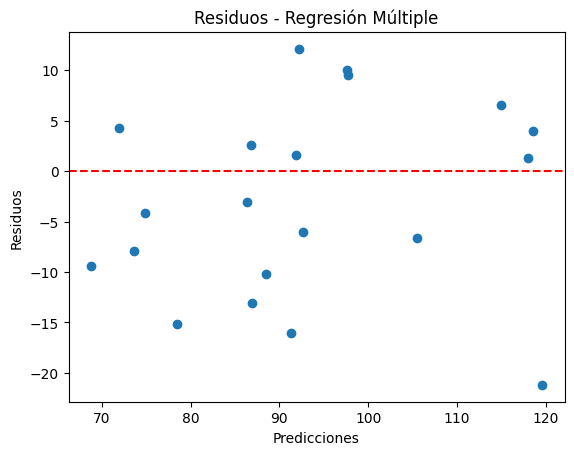

In [100]:
# Evaluación del modelo
print("\nEvaluación del modelo (Regresión Múltiple):")

#Promedio del valor absoluto de los errores
print("MAE:", mean_absolute_error(y_test_v23, y_pred_multiple_v23))

#Promedio del valor de los errores elevados al cuadrado
print("MSE:", mean_squared_error(y_test_v23, y_pred_multiple_v23))

#Que tan bueno es mi modelo para predecir datos nuevos. Es un porcentaje
print("R²:", r2_score(y_test_v23, y_pred_multiple_v23))

#Que tan bien explica mis datos. Es un porcentaje
print("Varianza explicada:", explained_variance_score(y_test_v23, y_pred_multiple_v23))


residuos = y_test_v23 - y_pred_multiple_v23
plt.scatter(y_pred_multiple_v23, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos - Regresión Múltiple")
plt.show()




### Interpretación y visualización
- Analizar coeficientes del modelo (importancia de features).
- Visualizar predicciones vs valores reales.
- Identificar patrones y posibles mejoras.

### Ajustes y mejoras
- Probar otras variables, transformaciones, o modelos.
- Evaluar el impacto de outliers o valores faltantes.
- Refinar el pipeline para producción.

### Guardado de resultados
- Guardar modelo entrenado (joblib o pickle).
- Guardar dataset procesado y resultados de predicción.

# Resultados

## Evaluacion de los modelos
| Modelo | Variables | Split | MAE | MSE | R² | Varianza Explicada |
|--------|-----------|-------|----------------|----------------|----------------|----------------------|
| v2.3 | Edad - Estres - Horas ejercicio - Peso | 80/20 | 8.22808779620991 | 94.5734310489099 | 0.7425602618626821 | 0.7678348628854672 |
| v2.1 | Edad - Estres - Horas ejercicio - Peso | 90/10 | 8.018085828729093 | 97.50144996821571 | 0.694671608185863 | 0.7368767438095558 |
| v2 | Edad - Estres - Horas ejercicio - Peso | 75/25 | 9.003650428075321 | 121.70809563578364 | 0.7052617350440947 | 0.705304582242068 |
| v2.2 | Edad - Estres - Horas ejercicio - Peso | 70/30 | 9.401797173401373 | 130.362900619487 | 0.6996025481278572 | 0.7182451050084048 |
| v1 | Todas las variables | 75/25 | 9.25057695959363 | 130.42962501335683 | 0.6841409671684686 | 0.6841689451188642 |
| v3 | Edad - Estres - Peso | 75/25 | 10.439682220566931 | 159.8823903181093 | 0.6128157451384237 | 0.6166075781513103 |
| v4 | Edad - Peso | 75/25 | 12.73743139127796 | 235.86742154176994 | 0.42880418741508164 | 0.4427952701759488 |
| v5 | Peso | 75/25 | 15.118670255919012 | 311.93512946065204 | 0.24459241305393453 | 0.253370554086648 |


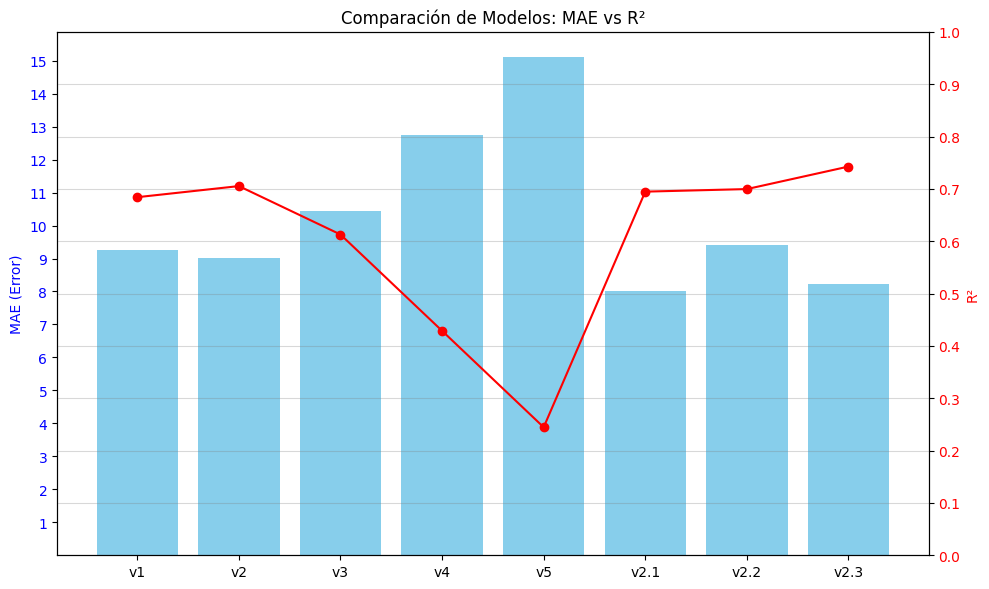

In [107]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos
modelos = ["v1", "v2", "v3", "v4", "v5", "v2.1", "v2.2", "v2.3"]
mae = [9.2506, 9.0036, 10.4397, 12.7374, 15.1187, 8.0181, 9.4018, 8.2281]
r2 = [0.6841, 0.7053, 0.6128, 0.4288, 0.2446, 0.6947, 0.6996, 0.7426]

# Crear DataFrame
df_resultados = pd.DataFrame({
    "Modelo": modelos,
    "MAE": mae,
    "R²": r2
})

# Gráfico
fig, ax1 = plt.subplots(figsize=(10,6))

# Barras para MAE
ax1.bar(df_resultados["Modelo"], df_resultados["MAE"], color="skyblue", label="MAE")
ax1.set_ylabel("MAE (Error)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_yticks(np.arange(1, 16, 1))

# Segundo eje para R²
ax2 = ax1.twinx()
ax2.plot(df_resultados["Modelo"], df_resultados["R²"], color="red", marker="o", label="R²")
ax2.set_ylabel("R²", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.set_ylim(0, 1)  # R² entre 0 y 1
ax2.set_yticks(np.arange(0, 1.1, 0.1))  # R² de 0.1 en 0.1

# Título y leyendas

plt.title("Comparación de Modelos: MAE vs R²")
plt.grid(True, color="gray", alpha=0.3)
fig.tight_layout()
plt.show()


## Análisis de Factores que Influyen en la Presión Arterial

### 1. Variables más influyentes
- **Peso**: Correlación positiva fuerte (0.5888). Su inclusión mejora notablemente R² y reduce MAE y MSE.  
- **Edad**: Correlación moderada positiva (0.4187). Aporta significativamente a la predicción.  
- **Estrés**: Correlación moderada positiva (0.3664). Ayuda a explicar variaciones adicionales.  
- **Horas de ejercicio**: Correlación moderada negativa (-0.3589). Funciona como factor protector frente a presión elevada.

> Los modelos que incluyen estas variables (`v2`, `v2.1`, `v2.2`, `v2.3`) muestran el mejor desempeño.  

### 2. Impacto del split y resultados
- **v2 (75/25)**: MAE ≈ 9.00, R² ≈ 0.705 – Buen desempeño, aunque con mayor error que los splits más grandes.  
- **v2.1 (90/10)**: MAE ≈ 8.02, R² ≈ 0.695 – Menor MAE por más datos de entrenamiento, pero R² ligeramente menor.  
- **v2.2 (70/30)**: MAE ≈ 9.40, R² ≈ 0.700 – Error mayor por más datos de test, R² similar a v2.  
- **v2.3 (80/20)**: MAE ≈ 8.23, R² ≈ 0.743 – Mejor balance entre entrenamiento y test, mayor capacidad predictiva y varianza explicada.  

> Se observa que un split equilibrado (80/20, v2.3) ofrece el mejor desempeño general, mostrando la importancia de un adecuado balance entre datos de entrenamiento y test.

### 3. Variables poco influyentes
- **Ingresos**: Correlación casi nula (-0.0094). No aportan significativamente.  
- **Horas de TV**: Correlación muy baja (0.0408). Impacto despreciable.

### 4. Conclusión general
El análisis indica que **peso, edad, estrés y ejercicio** son los factores clave que afectan la presión arterial.  
- El **peso** tiene la mayor influencia.  
- **Edad** y **estrés** tienen efecto positivo sobre la presión.  
- **Ejercicio** actúa como factor protector.  
- Factores como **ingresos** y **horas de TV** no son determinantes en este conjunto de datos.
